In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, metrics
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from IPython.display import Image

### basic

In [2]:
# 建立 dataframe

dic = {
    "col 1": [1,2,3,4,5,6,7,8,9,10], 
    "col 2": [5,48,20,69,88,14,32,39,50,9],
    "col 3": [1,1,0,1,1,0,0,0,1,0],
    "col 4": [0,3,3,4,2,2,4,4,1,0],

}
df = pd.DataFrame(dic)
df

,col 1,col 2,col 3,col 4
0,1,5,1,0
1,2,48,1,3
2,3,20,0,3
3,4,69,1,4
4,5,88,1,2
5,6,14,0,2
6,7,32,0,4
7,8,39,0,4
8,9,50,1,1
9,10,9,0,0


6675.5
2043.0833333333335
607.25
416.0
233.0
125.5
76.0
47.5


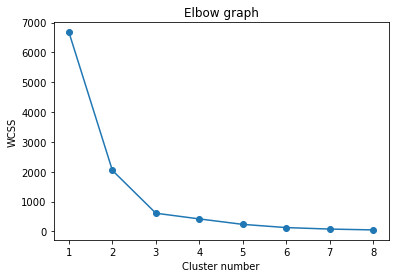

In [3]:
# 計算 wcss 損失函數

wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(np.array(df[df.columns]))
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

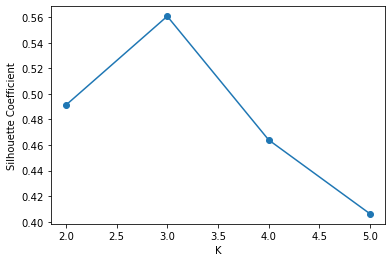

In [4]:
# 計算輪廓系數

Scores = []
for i in range(2,6):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42).fit(np.array(df[df.columns]))
    silhouette_avg = metrics.silhouette_score(np.array(df[df.columns]),kmeans.labels_)
    Scores.append(silhouette_avg)

plt.plot(range(2,6), Scores, marker='o')

plt.xlabel('K')
plt.ylabel('Silhouette Coefficient') 
plt.show()

In [5]:
k = 3
kmeans = KMeans(n_clusters=k).fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(df)
df['cluster'] = labels
display(df.sort_values(by='cluster'))
#各分類數量
display(df['cluster'].value_counts())

,col 1,col 2,col 3,col 4,cluster
1,2,48,1,3,0
6,7,32,0,4,0
7,8,39,0,4,0
8,9,50,1,1,0
0,1,5,1,0,1
2,3,20,0,3,1
5,6,14,0,2,1
9,10,9,0,0,1
3,4,69,1,4,2
4,5,88,1,2,2


1    4
0    4
2    2
Name: cluster, dtype: int64

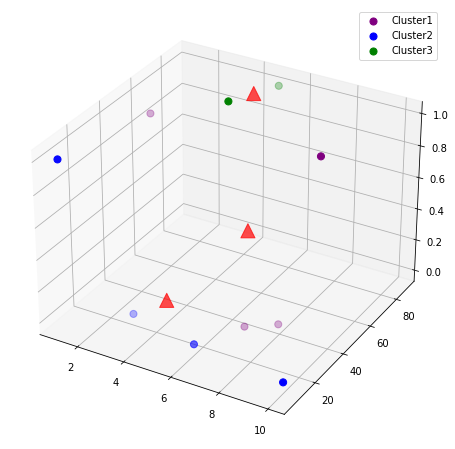

In [6]:
from mpl_toolkits.mplot3d import Axes3D

colors=['purple', 'blue', 'green', 'gold']
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')
for i in range(kmeans.n_clusters):
    df_cluster=df[df['cluster']==i]
    ax.scatter(df_cluster['col 1'], df_cluster['col 2'],df_cluster['col 3'],s=50,label='Cluster'+str(i+1), c=colors[i])
plt.legend()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=200,marker='^', c='red', alpha=0.7, label='Centroids')

### 鳶尾花

In [16]:
np.random.seed(5)  # 設定隨機種子

iris = datasets.load_iris()  # 鳶尾花資料集
X = iris.data   # 花的四種特徵
print("iris.data", X.shape)

y = iris.target  # 花的種類
print("iris.target", y.shape)

iris.data (150, 4)
iris.target (150,)


In [42]:
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] 
df_iris = pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)],axis=1)
df_iris.columns = columns
df_iris = df_iris.iloc[:,0:4]
df_iris

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

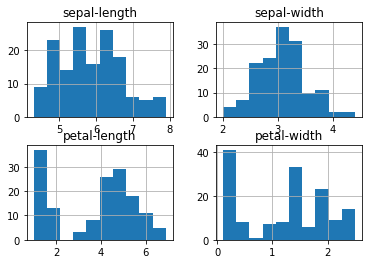

In [43]:
df_iris.hist()

In [44]:
df_iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>

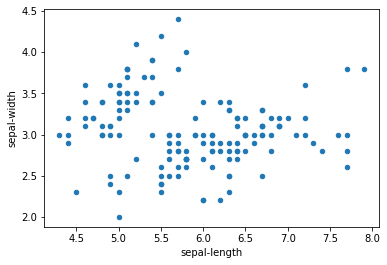

In [45]:
df_iris.plot(x='sepal-length', y='sepal-width', kind='scatter')

<AxesSubplot:ylabel='Density'>

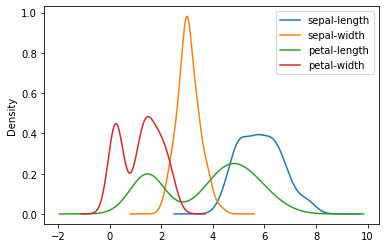

In [46]:
df_iris.plot(kind='kde')  #KDE图，KDE图也被称作密度图(Kernel Density Estimate,核密度估计)

sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

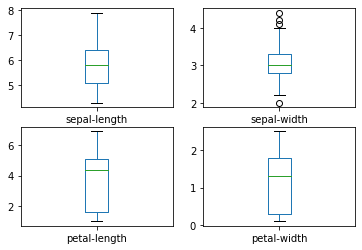

In [47]:
df_iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

In [52]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(df_iris.iloc[:,:-1].values)
pos = pd.DataFrame()
pos['X'] = X[:,0]
pos['Y'] = X[:,1]
pos['class'] = df_iris['class']
ax = pos.ix[pos['class']=='Iris-virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')
ax = pos.ix[pos['class']=='Iris-setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)
ax = pos.ix[pos['class']=='Iris-versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)

LinAlgError: SVD did not converge

Text(0, 0.5, '花瓣寬度')

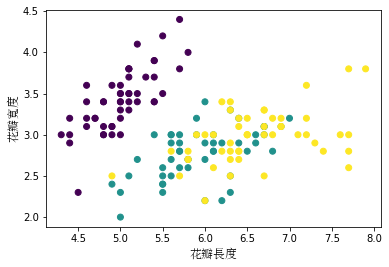

In [11]:
# 前兩列 花萼長與寬
X_2 = iris.data[:, :2]
y = iris.target

plt.scatter(X_2[:,0], X_2[:,1], c=y)
plt.xlabel('花瓣長度', fontsize=12, fontproperties="SimSun")
plt.ylabel('花瓣寬度', fontsize=12, fontproperties="SimSun")

In [12]:
model = KMeans(n_clusters=3)  # 建立KMeans模型
model.fit(X)  # 將花的特徵數據 X套用到 KMeans模型進行分類
labels = model.labels_  # 模型自動產生的分類標記
print("labels", labels, labels.shape)

labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0] (150,)


In [13]:
print("model.fit_predict", model.fit_predict(X), model.fit_predict(X).shape)

model.fit_predict [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1] (150,)


In [14]:
i = 0
for labels_name, target_name in zip(labels, y):
    # 修正KMeans自動分群標籤labels_name 1為0而0為1
    if labels_name == 1:
        labels_name = 0
    elif labels_name == 0:
        labels_name = 1
    if labels_name != target_name:
        #print(labels_name, target_name)
        i=i+1
print("Accuracy:", str((len(X)-i)/len(X)), "%")


Accuracy: 0.8933333333333333 %


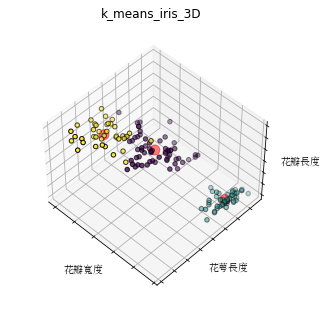

In [15]:
fig = plt.figure('f0', figsize=(5, 4))  # 建立圖型
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# 用三個特徵值數列，畫出3D圖型上的點
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='k')

# 畫出KMeans模型的重心(質心)
C = model.cluster_centers_
ax.scatter(C[:, 3], C[:, 0], C[:, 2], c='red', s=100, alpha=0.5)

ax.w_xaxis.set_ticklabels([])  # 取消 x軸刻度
ax.w_yaxis.set_ticklabels([])  # 取消 y軸刻度
ax.w_zaxis.set_ticklabels([])  # 取消 z軸刻度

ax.set_xlabel('花瓣寬度', fontproperties="SimSun")  # 宋體
ax.set_ylabel('花萼長度', fontproperties="SimSun")  # 宋體
ax.set_zlabel('花瓣長度', fontproperties="SimSun")  # 宋體
ax.set_title('k_means_iris_3D')
ax.dist = 12  # 與3D圖的距離
plt.show()